In [1]:
import sqlalchemy as db
import pandas as pd
import matplotlib.pyplot as plt
from config import database_url

In [2]:
engine = db.create_engine(database_url)
connection = engine.connect()
metadata = db.MetaData()

In [3]:
avg_salary = db.Table('avg_salary', metadata, autoload=True, autoload_with=engine)

In [4]:
query = db.select([avg_salary])
results = connection.execute(query).fetchall()
avg_salary = pd.DataFrame(results)
avg_salary.columns = results[0].keys()

In [5]:
avg_salary['avg_salary'] = avg_salary['avg_salary'].astype(float)
avg_salary = avg_salary.set_index('title')
avg_salary

,avg_salary
title,
Assistant Engineer,48493.20
Engineer,48547.81
Manager,57290.78
Senior Engineer,48425.34
Senior Staff,58548.39
Staff,58465.50
Technique Leader,48581.54


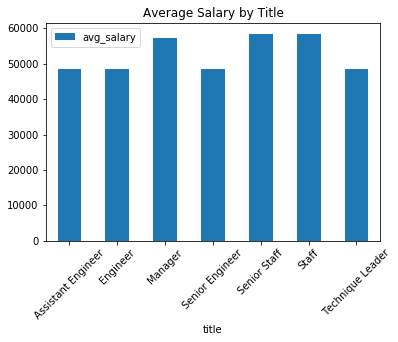

In [6]:
avg_salary.plot.bar()
plt.xticks(rotation = 45)
plt.title('Average Salary by Title')
plt.show()